### Exploring the datasets created from the Data Wrangling ipynb.

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import the csv files of the data created in the Data Wrangling step as pandas dataframes.
wod_df_loc = pd.read_csv("C:/Users/sethh/OneDrive/Desktop/Springboard/Capstone Project 1/wod_df_loc.csv", 
                         index_col=[0,1], parse_dates=True)
wod_df_date = pd.read_csv("C:/Users/sethh/OneDrive/Desktop/Springboard/Capstone Project 1/wod_df_date.csv", 
                          index_col = 0, parse_dates=True)
hurricanes_df = pd.read_csv("C:/Users/sethh/OneDrive/Desktop/Springboard/Capstone Project 1/hurricanes_df.csv", 
                            index_col = 0, parse_dates=True)

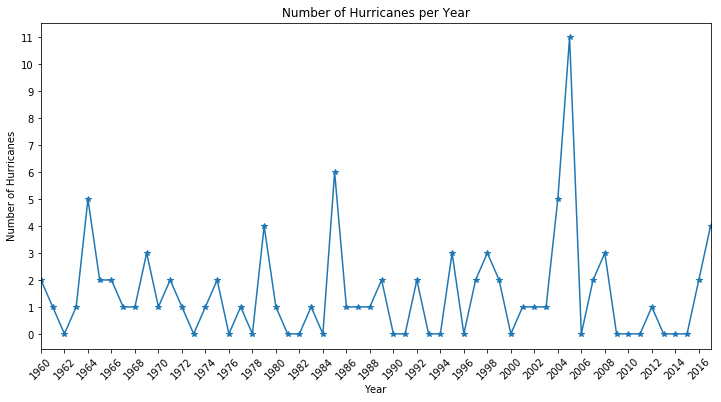

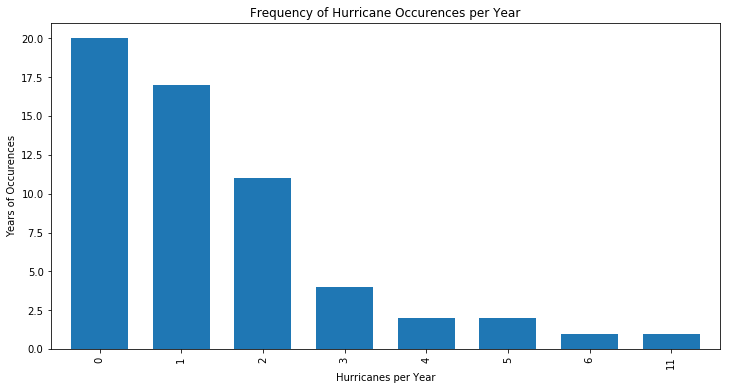

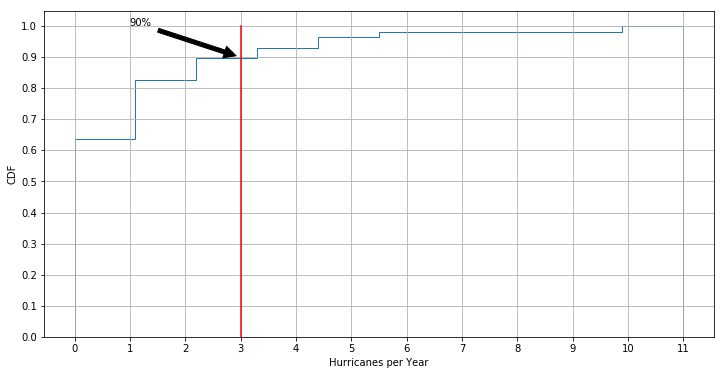

In [2]:
#group all data by year and only use the year of the date as the index
hurricanes_year = hurricanes_df.resample('A').count().name
hurricanes_year.index = hurricanes_year.index.year
hurricanes_year.plot(marker = '*', yticks = range(0,12), xticks = range(1960,2018,2), figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Number of Hurricanes per Year')
plt.xticks(rotation=45)
plt.show()

#count frequency of hurricane occurences per year
hurricanes_year.value_counts().sort_index().plot(kind = 'bar',figsize=(12,6), width = 0.7)
plt.xlabel('Hurricanes per Year')
plt.ylabel('Years of Occurences')
plt.title('Frequency of Hurricane Occurences per Year')
plt.show()

#plot a cummulative distribution function of the frequency occurences per year.
hurricanes_year.hist(cumulative=True, normed=True, histtype='step', figsize=(12,6))
plt.plot([3,3],[0,1],color='red')
plt.ylabel('CDF')
plt.xlabel('Hurricanes per Year')
plt.xticks(range(0,12))
plt.yticks(np.arange(0,1.1,0.1))
plt.annotate('90%', xy=(3,0.9),xytext=(1,1), 
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

### 90% of the years had 3 hurricanes or less with most years have 0 or 1 hurricane per year.  This trend is pretty steady throughout history with a few outlying years, most notably 2005 with 11 hurricane impacts along the gulf coast.  These will be evaluated in greater detail later on below.

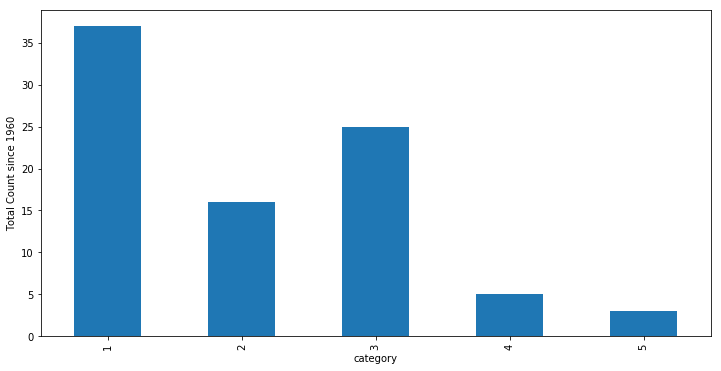

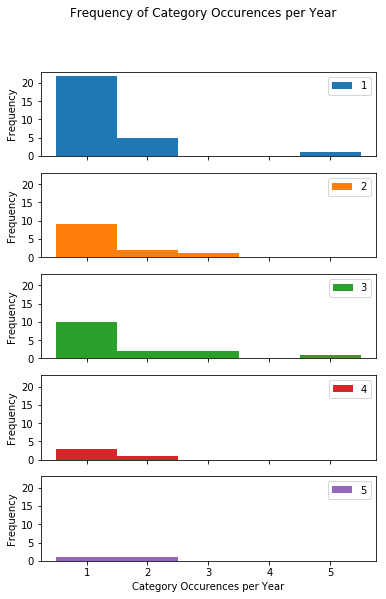

In [3]:
#look into the breakdown by hurricane category
categories = hurricanes_df.groupby('category').count()
categories.name.plot(kind='bar', figsize=(12,6))
plt.ylabel('Total Count since 1960')
plt.show()

#get a frequency per year by category plot
categories_year = pd.pivot_table(hurricanes_df,columns='category',index=hurricanes_df.index, values='state', aggfunc='count')
categories_year = categories_year.resample('A').sum()
categories_year.index = categories_year.index.year
categories_year.plot(kind='hist', bins=[1,2,3,4,5,6], align = 'left',
             figsize=(6,9),yticks=range(0,25,5), sharey=True, sharex=True, 
             subplots=True,title='Frequency of Category Occurences per Year')
plt.xlabel('Category Occurences per Year')
plt.show()

### After reviewing the category data, it shows that the most frequent category is Category 1 and the least frequent is Category 5.  Moreover, the most highest hurricane occurrence frequency is 1 per year.

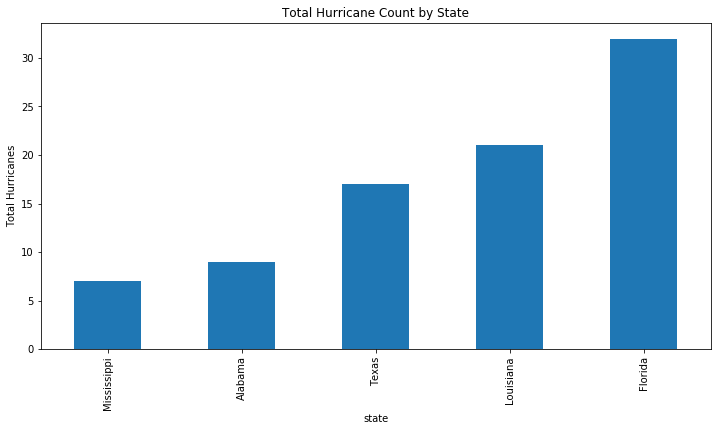

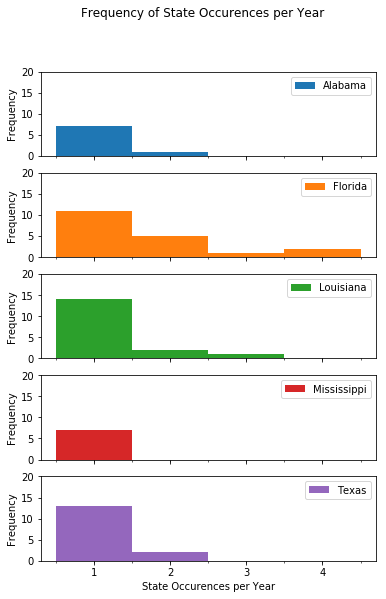

In [8]:
#now, looking at the hurricanes by state data
states = hurricanes_df.groupby('state').count().category.sort_values()
states.plot(kind='bar', figsize=(12,6))
plt.ylabel('Total Hurricanes')
plt.title('Total Hurricane Count by State')
plt.show()

#get a frequency per year by state plot
states_year = pd.pivot_table(hurricanes_df,columns='state',index=hurricanes_df.index, values='category', aggfunc='count')
states_year = states_year.resample('A').sum()
states_year.index = states_year.index.year
states_year.plot(kind='hist', bins=[1,2,3,4,5], align = 'left',
             figsize=(6,9),yticks=range(0,25,5), sharey=True, sharex=True, xticks=range(1,5), 
             subplots=True,title='Frequency of State Occurences per Year')
plt.xlabel('State Occurences per Year')
plt.show()

### After review of cursory hurricanes by state data, it seems Florida and Louisiana are impacted the most with Alabama impacted the least.  Different factors such as the sea conditions, coast line length, and seafloor depth will be compared against these statistics below.